In [157]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [158]:
from pandas_datareader import data as pdr
from pandas_datareader._utils import RemoteDataError
import yfinance as yfin
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

yfin.pdr_override()

In [159]:
end_date =  datetime.now().date() - timedelta(days=365)
start_date = end_date - timedelta(days=50000)

prices = pdr.get_data_yahoo('AAPL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [160]:
data = prices
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [161]:
data.shape

(10727, 6)

In [162]:
data['return'] = np.log(data['Close'] / data['Close'].shift(1))
data.tail()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,184.291260,48088700,-0.007582
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.066513,50730800,0.014947
2023-06-28,187.929993,189.899994,187.600006,189.250000,188.250244,51216800,0.006308
2023-06-29,189.080002,190.070007,188.940002,189.589996,188.588440,46347300,0.001795
2023-06-30,191.630005,194.479996,191.259995,193.970001,192.945312,85069600,0.022840


In [163]:
new_data = data[['Close']]
new_data.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [164]:
new_data['Date'] = new_data.index
new_data = new_data[['Date', 'Close']]
new_data.reset_index(drop=True, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11172\161943498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Date'] = new_data.index


In [165]:
new_data.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [166]:
new_data['Date'] = pd.to_datetime(new_data['Date'], format='%Y-%m-%d')
new_data = new_data.rename(columns={'Date': 'ds', 'Close': 'y'})
# Verify the changes
new_data.head()

,ds,y
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [167]:
new_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [168]:
m = Prophet()
m.fit(new_data)

20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing


In [169]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
10752,2023-07-26
10753,2023-07-27
10754,2023-07-28
10755,2023-07-29
10756,2023-07-30


In [170]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10752,2023-07-26,158.802990,147.269694,170.861083
10753,2023-07-27,158.833946,147.136797,170.558690
10754,2023-07-28,158.860739,147.039324,170.347635
10755,2023-07-29,159.018117,145.923080,171.292328
10756,2023-07-30,159.110440,147.844100,171.825496


d:\languages\DataScience\Time series\spp_venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\languages\DataScience\Time series\spp_venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


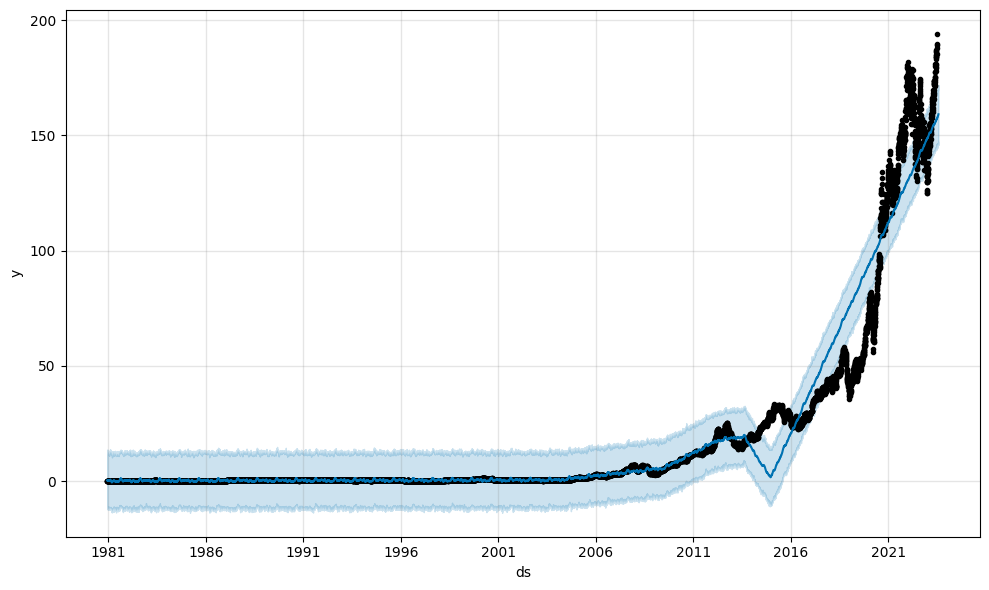

In [171]:
fig1 = m.plot(forecast)

In [172]:
end_date =  datetime.now().date()
start_date = end_date - timedelta(days=365)

current_prices = pdr.get_data_yahoo('AAPL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [173]:
current_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443298,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319275,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,187.613647,59922200


In [174]:
current_prices['Date'] = current_prices.index
current_prices = current_prices[['Date', 'Close']]
current_prices.reset_index(drop=True, inplace=True)
current_prices['Date'] = pd.to_datetime(current_prices['Date'], format='%Y-%m-%d')
current_prices = current_prices.rename(columns={'Date': 'ds', 'Close': 'y'})
current_prices.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11172\4221668532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_prices['Date'] = pd.to_datetime(current_prices['Date'], format='%Y-%m-%d')


,ds,y
0,2023-07-03,192.460007
1,2023-07-05,191.330002
2,2023-07-06,191.809998
3,2023-07-07,190.679993
4,2023-07-10,188.610001


In [175]:
y = current_prices[['ds', 'y']]
yhat = forecast[['ds', 'yhat']]
merged_df = pd.merge(y, yhat, on='ds')

In [176]:
merged_df.head()

,ds,y,yhat
0,2023-07-03,192.460007,157.300805
1,2023-07-05,191.330002,157.450737
2,2023-07-06,191.809998,157.450462
3,2023-07-07,190.679993,157.444010
4,2023-07-10,188.610001,157.683603


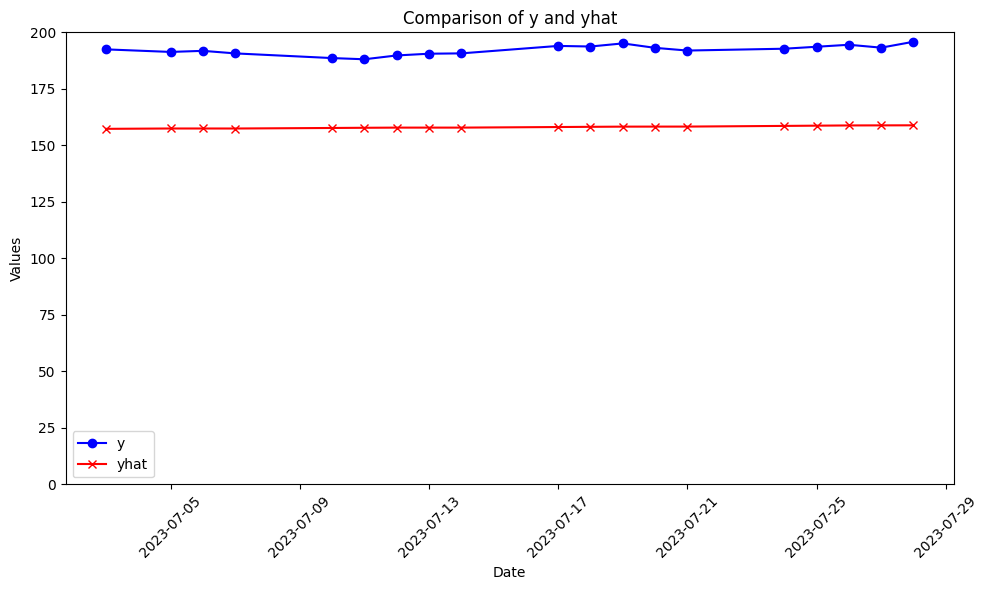

In [177]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called merged_df

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot y values
plt.plot(merged_df['ds'], merged_df['y'], label='y', color='blue', marker='o')

# Plot yhat values
plt.plot(merged_df['ds'], merged_df['yhat'], label='yhat', color='red', marker='x')

# Adding title and labels
plt.title('Comparison of y and yhat')
plt.xlabel('Date')
plt.ylabel('Values')

# Setting the y-axis scale from 0 to 10000
plt.ylim(0, 200)

# Adding a legend
plt.legend()

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()